# Parts 1 and 2

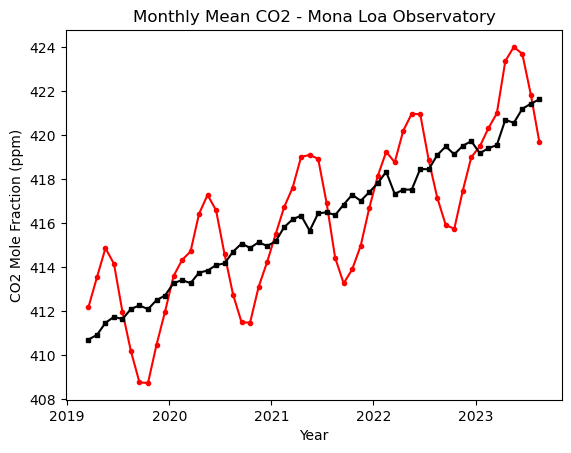

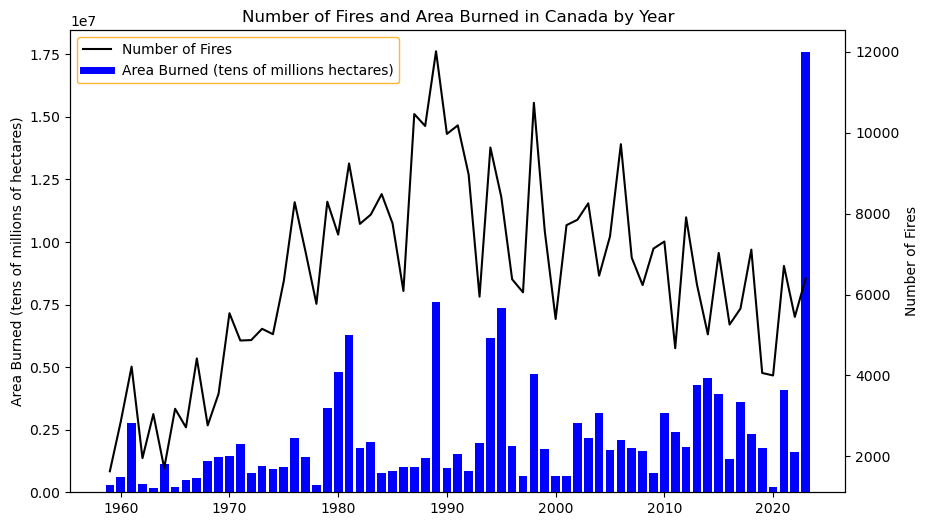

In [1]:
# Monthly Mean CO2 Data
# Chat GPT: How to plot loaded csv file in pandas
import pandas as pd
import matplotlib.pyplot as plt
co2_data = "Data\co2_mm_mlo.csv"
df = pd.read_csv(co2_data, comment = '#')

# Chat GPT: How to plot last data entries
plt.plot(df["decimal date"].tail(54), df["average"].tail(54), color = 'r', marker = 'o', markersize = 3)

plt.plot(df["decimal date"].tail(54), df["deseasonalized"].tail(54), color = "black", marker = "s", markersize = 3)

plt.xlabel("Year")
plt.ylabel("CO2 Mole Fraction (ppm)")
plt.title("Monthly Mean CO2 - Mona Loa Observatory")
plt.show()

##############################################################################################################################################

# Number of fires burned and area burned in Canada by year
nfdb = "Data/NFDB_point_stats.csv"
data = pd.read_csv(nfdb, comment = '#', thousands = ',')

# Chat GPT: How to have 2 y-axes on the same plot
fig, ax1 = plt.subplots(figsize = (10,6))
ax1.bar(data["YEAR"], data["TOTAL_HA"], color = 'blue', label = "Area burned, CNFDB")
ax1.set_ylabel("Area Burned (tens of millions of hectares)")
ax2 = ax1.twinx()
ax2.plot(data["YEAR"], data["FIRES"], color = 'black', label = "Number of fires, CNFDB")
ax2.set_xlabel("Years")
ax2.set_ylabel('Number of Fires')

# Chat GPT: Create legend from scratch
legend1 = plt.Line2D([], [], color = 'k', label = 'Number of Fires')
legend2 = plt.Line2D([], [], color = 'b', linewidth = 5, label = 'Area Burned (tens of millions hectares)')
ax1.legend(handles = [legend1, legend2], loc = 'upper left', frameon = True, edgecolor = 'orange')

plt.title("Number of Fires and Area Burned in Canada by Year")
plt.show()

# Part 3

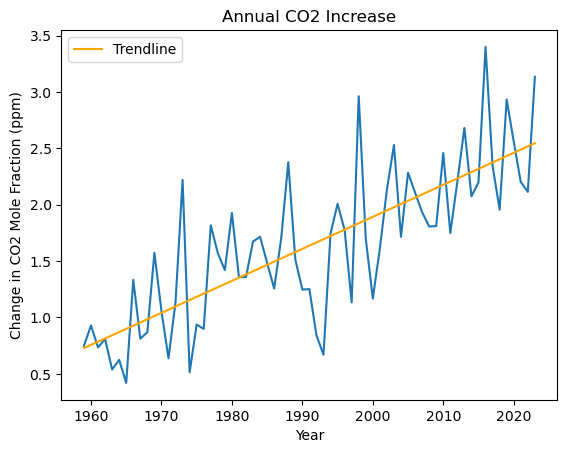

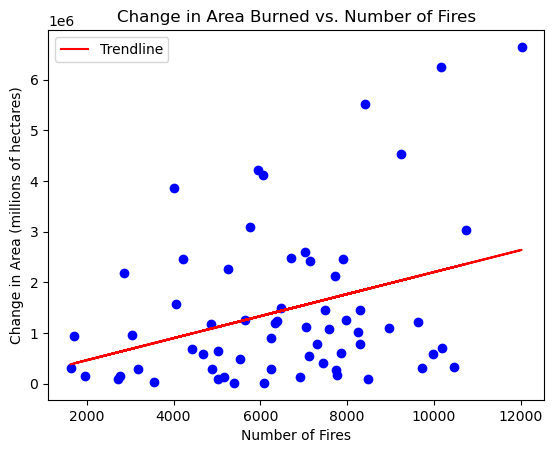

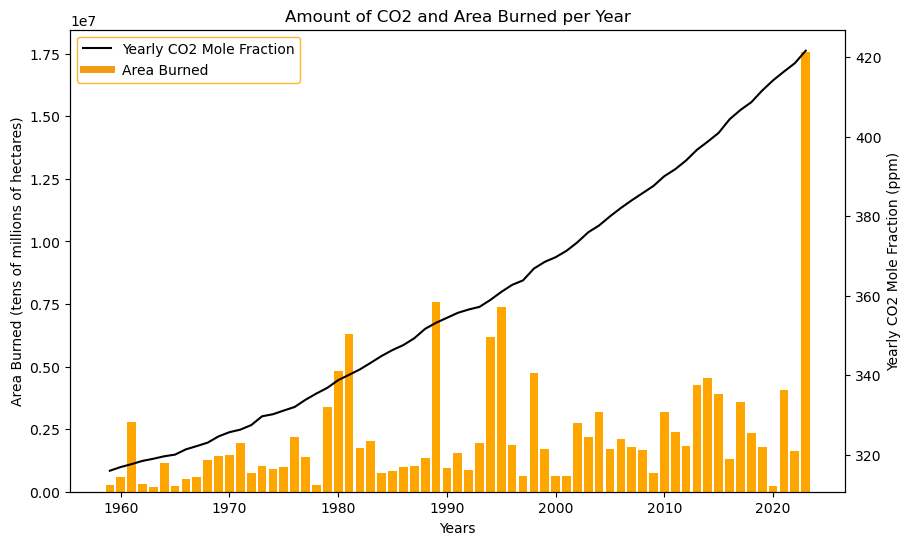

In [97]:
import numpy as np

# CO2 increase vs. area burned
co2_data = pd.read_csv('Data/co2_mm_mlo.csv', comment = '#')
wildfire_data = pd.read_csv("Data/NFDB_point_stats.csv", comment = '#', thousands = ',')

yearly_co2 = co2_data.groupby('year')['average'].mean()
co2_difference = []
iterator = 1959
for values in yearly_co2:
    if iterator == 2024:
        continue
    co2_difference.append(yearly_co2[iterator] - yearly_co2[iterator-1])
    iterator += 1

years = list(range(1959,2024))

# Chat GPT: How to create a trendline using Matplotlib
coefficients = np.polyfit(years, co2_difference, 1)
slope, intercept = coefficients
predicted_values = np.polyval(coefficients, years)

plt.plot(years, co2_difference)
plt.plot(years, predicted_values, label = 'Trendline', color = 'orange')
plt.legend()
plt.title("Annual CO2 Increase")
plt.ylabel("Change in CO2 Mole Fraction (ppm)")
plt.xlabel("Year")
plt.show()

###########################################################################################################################################

# Change in area burned vs. number of fires
area_diff = []
area_data = wildfire_data["TOTAL_HA"]
iterator = 2
for values in area_data:
    if iterator == 65:
        continue
    area_diff.append(abs(area_data[iterator] - area_data[iterator-1]))
    iterator += 1

fire_data = wildfire_data["FIRES"][2:]

coefficients = np.polyfit(fire_data, area_diff, 1)
slope, intercept = coefficients
predicted_values = np.polyval(coefficients, fire_data)

plt.scatter(fire_data, area_diff, color = 'blue')
plt.plot(fire_data, predicted_values, label = 'Trendline', color = 'red')
plt.title("Change in Area Burned vs. Number of Fires")
plt.xlabel("Number of Fires")
plt.ylabel("Change in Area (millions of hectares)")
plt.legend()
plt.show()
###########################################################################################################################################

# Fires > 200 ha and amount of CO2 per year
recent_co2 = yearly_co2[1:]
flipped_co2 = recent_co2[::-1]
fig, ax1 = plt.subplots(figsize = (10,6))
ax1.bar(data["YEAR"], data["TOTAL_HA"], color = 'orange', label = "Area burned, CNFDB")
ax1.set_ylabel("Area Burned (tens of millions of hectares)")
ax2 = ax1.twinx()
ax2.plot(wildfire_data["YEAR"], flipped_co2, color = 'black', label = "Number of fires, CNFDB")

# Legend wasn't working so I made one manually
legend1 = plt.Line2D([], [], color = 'k', label = 'Yearly CO2 Mole Fraction')
legend2 = plt.Line2D([], [], color = '#F39C12', linewidth = 5, label = 'Area Burned')
ax1.legend(handles = [legend1, legend2], loc = 'upper left', frameon = True, edgecolor = 'orange')

ax1.set_xlabel("Years")
ax2.set_ylabel('Yearly CO2 Mole Fraction (ppm)')
plt.title("Amount of CO2 and Area Burned per Year")
plt.show()

# Part 4

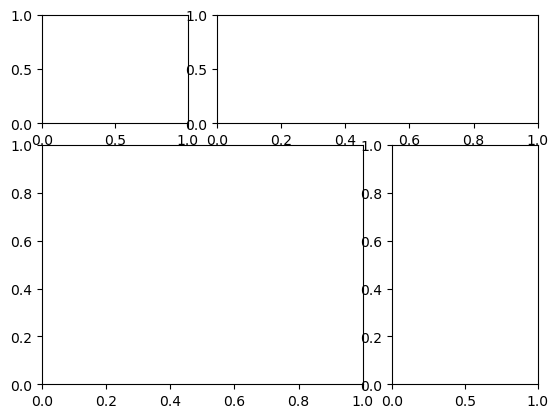

In [16]:
# Infographic

fig = plt.figure()

ax1 = plt.subplot2grid((3,3),(0,0))
ax2 = plt.subplot2grid((3,3),(0,1), colspan = 2)
ax3 = plt.subplot2grid((3,3),(1,0), colspan = 2, rowspan = 2)
ax4 = plt.subplot2grid((3,3),(1,2), rowspan = 2)